#50 Startups

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

In [ ]:
#importing the basic libraries
import pandas as pd   #To Define DataFrame
import numpy as np    #To Define Array of Data

#Data Processing

In [ ]:
#importing the data to colab notebook
from google.colab import files   
data = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
#creating a dataframe as data_df
import io
data_df = pd.read_csv(io.BytesIO(data['50_Startups.csv'])) 

In [ ]:
#cheching the firsg five rows from the dataset
data_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Data Cleaning

In [ ]:
 #To find any missing values are present in the dataset
data_df.isnull().sum()         

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
 #to check the variable are how much correlated to each other variables
data_df.corr() 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


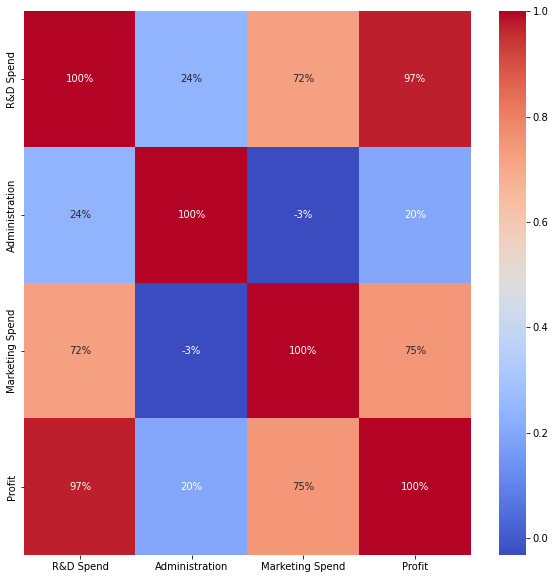

In [ ]:
#creating a heatmap to see the correlation between the various features
# heatmap is shows magnitude of a phenomenon as color in two dimensions
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
cor = data_df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

In [ ]:
x = data_df.drop(['Profit','State'],axis=1).values     #selecting only input values and drop the output column
y = data_df['Profit'].values          #selecting only output values

In [ ]:
print(x)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [ ]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


#Spliting the data into test_train_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

To train the model using linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)  #fitting the train set into the linear model

LinearRegression()

In [ ]:
#predict the values with the test datasset
y_pred = ml.predict(x_test)
print(y_pred)

[104054.44293869 132719.3459701  133640.26830949  72294.76911458
 179685.62227843 114508.97572031  66305.23069863  98297.69326565
 114277.91894933 169112.36095691  96257.40152149  87916.97242208
 110687.33942598  90670.8337806  127780.63539583]


In [ ]:
#for the linear model predicting the r2_score value as accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9355188337118219

here, am getting the 93% accuracy for the linear model.

#Visulization

here i done the visulization for predicted the actual graph using matplotlibrary with y_test and y_pred.

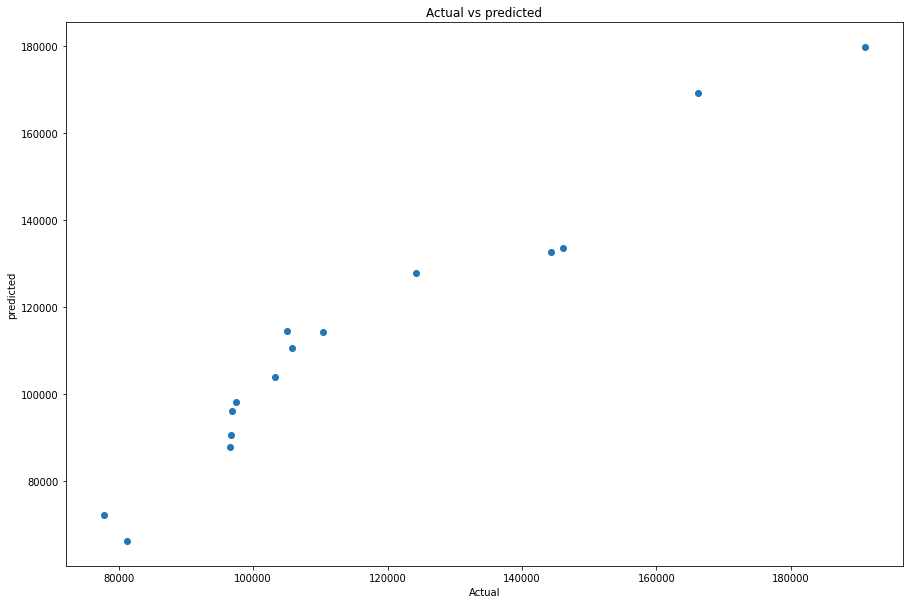

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')
plt.show()

In [ ]:
pred_y_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual value,predicted value,Difference
0,103282.38,104054.442939,-772.062939
1,144259.40,132719.345970,11540.054030
2,146121.95,133640.268309,12481.681691
3,77798.83,72294.769115,5504.060885
4,191050.39,179685.622278,11364.767722
5,105008.31,114508.975720,-9500.665720
6,81229.06,66305.230699,14923.829301
7,97483.56,98297.693266,-814.133266
8,110352.25,114277.918949,-3925.668949
9,166187.94,169112.360957,-2924.420957


#RMSE:Root Mean Square Error

 to measure how bad/erroneous the model's predictions are when compared to actual observed values. So a high RMSE is “bad” and a low RMSE is “good”

In [ ]:
from sklearn.metrics import mean_squared_error
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Root mean squared error: 7889.2502712814885


so here the RMSE value is too high for this model so we have to reduce the error

Calculating VIF(Variance Inflation Factor) for calculating multicolinearity with only input(X) variables to another input variables.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X =data_df[list(data_df.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,8.384571,R&D Spend
2,7.593984,Marketing Spend
1,4.026406,Administration


here,VIF values are less only.so,to achive a good model we need a less vif factor.

